In [42]:
# 数据的合并操作
import pandas as pd

df1 = pd.read_csv('1_A股市场.csv')
df2 = pd.read_csv('2_沪市A股.csv')
df3 = pd.read_csv('3_深市A股.csv')
df4 = pd.read_csv('4_B股市场.csv')
df5 = pd.read_csv('5_沪市B股.csv')
df6 = pd.read_csv('6_深市B股.csv')
df7 = pd.read_csv('7_创业板.csv')
df8 = pd.read_csv('8_科创板.csv')
df9 = pd.read_csv('9_新股.csv')
df10 = pd.read_csv('10_沪港通（沪股通）.csv')
df11 = pd.read_csv('11_深港通（深股通）.csv')
df12 = pd.read_csv('12_沪市风险警示板.csv')
df13 = pd.read_csv('13_北证A股.csv')

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

merged_df = pd.concat(dfs, ignore_index=True)

print(merged_df.shape)
merged_df.head()

(14895, 6)


,abbr,aggregate_market_value,capital_stock_in_circulation,code,total_stock_issue,traded_market_value
0,平安银行,21637598.79,1940557.18,1,1940591.82,21637212.61
1,万 科Ａ,8089021.02,971693.59,2,1193070.95,6588082.52
2,*ST国华,102329.96,12628.81,4,13238.03,97620.70
3,深振业Ａ,869396.81,134998.74,6,134999.50,869391.88
4,全新好,245978.11,34644.80,7,34644.80,245978.11


In [43]:
df_unique = merged_df.drop_duplicates()
print(df_unique.shape)

(5561, 6)


In [44]:
df_unique.to_csv('all_stock.csv')

In [45]:
df = pd.read_csv('output4.csv')
df.head()

,company,job,city,min_salary,max_salary,education,financing,insurance,bonus,examination,weekend,prospect,team,travel,train,min_experience,max_experience,min_size,max_size
0,河南端琪实业发展有限公司,Python软件开发工程师,郑州,6000.0,8000.0,不限,不需要融资,Y,Y,N,N,N,N,N,N,0,40,150,500
1,帮伯乐,python开发工程师,上海,10000.0,18000.0,本科,不需要融资,N,N,N,N,N,N,N,N,1,3,15,50
2,浙江巨能环境工程有限公司,python开发工程师,杭州,15000.0,30000.0,本科,不需要融资,Y,Y,Y,N,N,N,N,N,3,5,50,150
3,上海全晓信息技术有限公司,"软件工程师（C++/C, Java/C#, python）",南京,15000.0,25000.0,本科,未知,N,N,Y,N,N,N,N,N,3,5,0,208000
4,上海网擎信息系统有限公司,对日JAVA、Python高级工程师,上海,18000.0,35000.0,本科,不需要融资,Y,N,Y,N,N,N,Y,N,5,10,0,15


In [46]:
# 数据的连接操作

# 重命名列名以便连接操作
df_unique_rename = df_unique.rename(columns={'abbr': 'company'})

# 合并两个表格，以 'company' 列为键
df_merge = pd.merge(df, df_unique_rename, on='company', how='inner')

df_merge.to_csv('df_merge.csv')
df_merge.head()

,company,job,city,min_salary,max_salary,education,financing,insurance,bonus,examination,...,train,min_experience,max_experience,min_size,max_size,aggregate_market_value,capital_stock_in_circulation,code,total_stock_issue,traded_market_value
0,岩山科技,python开发工程师,上海,28000.0,35000.0,本科,不需要融资,Y,Y,Y,...,N,5,10,500,2000,3306658.95,561304.90,2195,568154.46,3266794.52
1,中新赛克,Python开发工程师,南京,14000.0,20000.0,本科,未知,N,N,N,...,N,3,5,0,208000,397510.66,16222.20,2912,17075.20,377652.84
2,鱼跃医疗,python开发工程师,南京,12000.0,24000.0,本科,不需要融资,N,N,N,...,N,3,5,2000,208000,3551775.76,94015.82,2223,100247.69,3330980.38
3,同花顺,python开发,杭州,15000.0,25000.0,本科,上市公司,N,N,N,...,N,1,3,2000,208000,13971148.80,27550.56,300033,53760.00,7159839.04
4,京北方,python开发,北京,14000.0,17000.0,本科,上市公司,N,N,N,...,N,3,5,2000,208000,1178195.96,60246.04,2987,61977.69,1145277.31


In [47]:
# 为上市公司打标签

# 在 df 中新建一列 'market'，初始值为 'N'
df['market'] = 'N'

# 检查 df 中的公司是否存在于 df_merge 中
df.loc[df['company'].isin(df_merge['company']), 'market'] = 'Y'

df.head()

,company,job,city,min_salary,max_salary,education,financing,insurance,bonus,examination,weekend,prospect,team,travel,train,min_experience,max_experience,min_size,max_size,market
0,河南端琪实业发展有限公司,Python软件开发工程师,郑州,6000.0,8000.0,不限,不需要融资,Y,Y,N,N,N,N,N,N,0,40,150,500,N
1,帮伯乐,python开发工程师,上海,10000.0,18000.0,本科,不需要融资,N,N,N,N,N,N,N,N,1,3,15,50,N
2,浙江巨能环境工程有限公司,python开发工程师,杭州,15000.0,30000.0,本科,不需要融资,Y,Y,Y,N,N,N,N,N,3,5,50,150,N
3,上海全晓信息技术有限公司,"软件工程师（C++/C, Java/C#, python）",南京,15000.0,25000.0,本科,未知,N,N,Y,N,N,N,N,N,3,5,0,208000,N
4,上海网擎信息系统有限公司,对日JAVA、Python高级工程师,上海,18000.0,35000.0,本科,不需要融资,Y,N,Y,N,N,N,Y,N,5,10,0,15,N


          min_salary                     max_salary                  
                mean      max     min          mean      max      min
market                                                               
N       12190.860215  40000.0  2000.0  19701.612903  60000.0   3000.0
Y       16318.181818  28000.0  8000.0  28181.818182  50000.0  16000.0


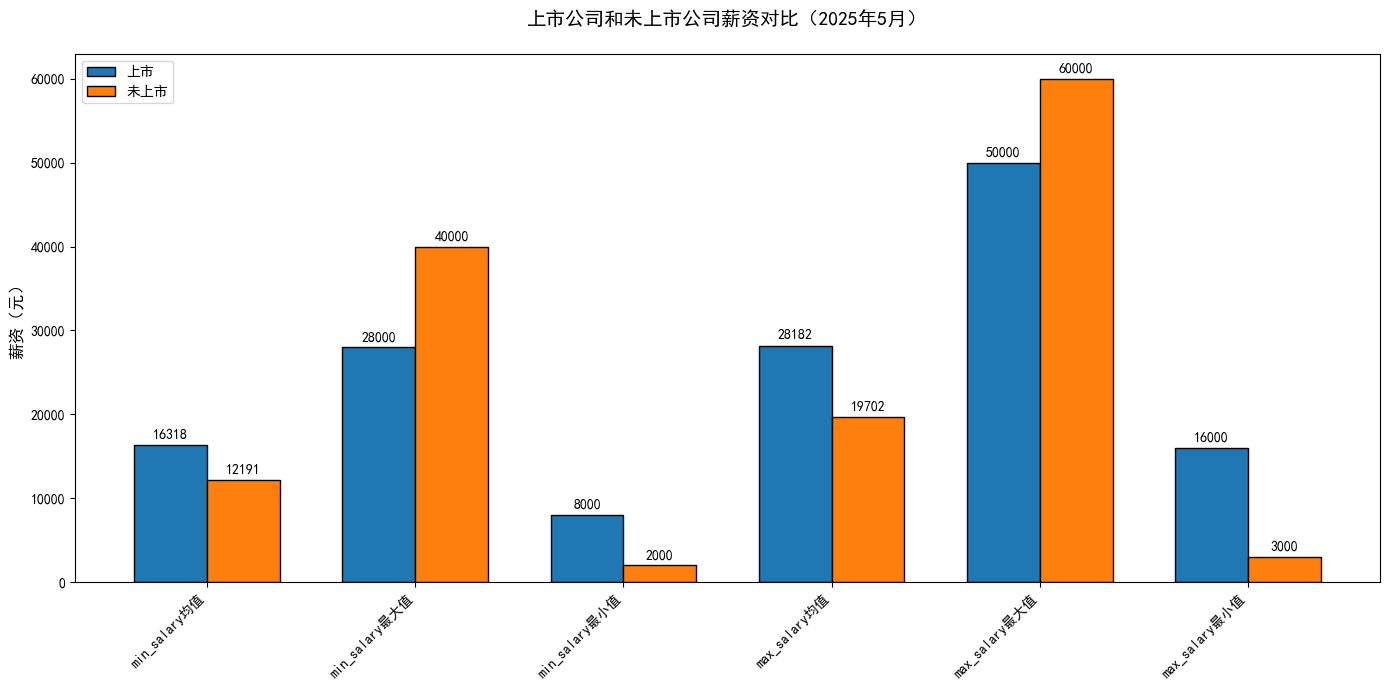

In [48]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

# 统计薪资指标
market_df = df.groupby("market")[['min_salary','max_salary']].agg(["mean", "max", "min"])

print(market_df)

cities = ['上市', '未上市']
metrics = ['min_salary均值', 'min_salary最大值', 'min_salary最小值', 'max_salary均值', 'max_salary最大值', 'max_salary最小值']

not_market = market_df.values[0]
market = market_df.values[1]

# 图表参数设置
x = np.arange(len(metrics))  # 指标位置
width = 0.35  # 柱体宽度
colors = ['#1f77b4', '#ff7f0e']  # 城市配色

# 创建画布
plt.figure(figsize=(14, 7))
ax = plt.subplot()

# 绘制并列柱状图[4,5](@ref)
rects1 = ax.bar(x - width/2, market, width, label='上市', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, not_market, width, label='未上市', color=colors[1], edgecolor='black')

# 图表元素配置
ax.set_ylabel('薪资（元）', fontsize=12)
ax.set_title('上市公司和未上市公司薪资对比（2025年5月）', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend(loc='upper left')

# 添加数值标签[5](@ref)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

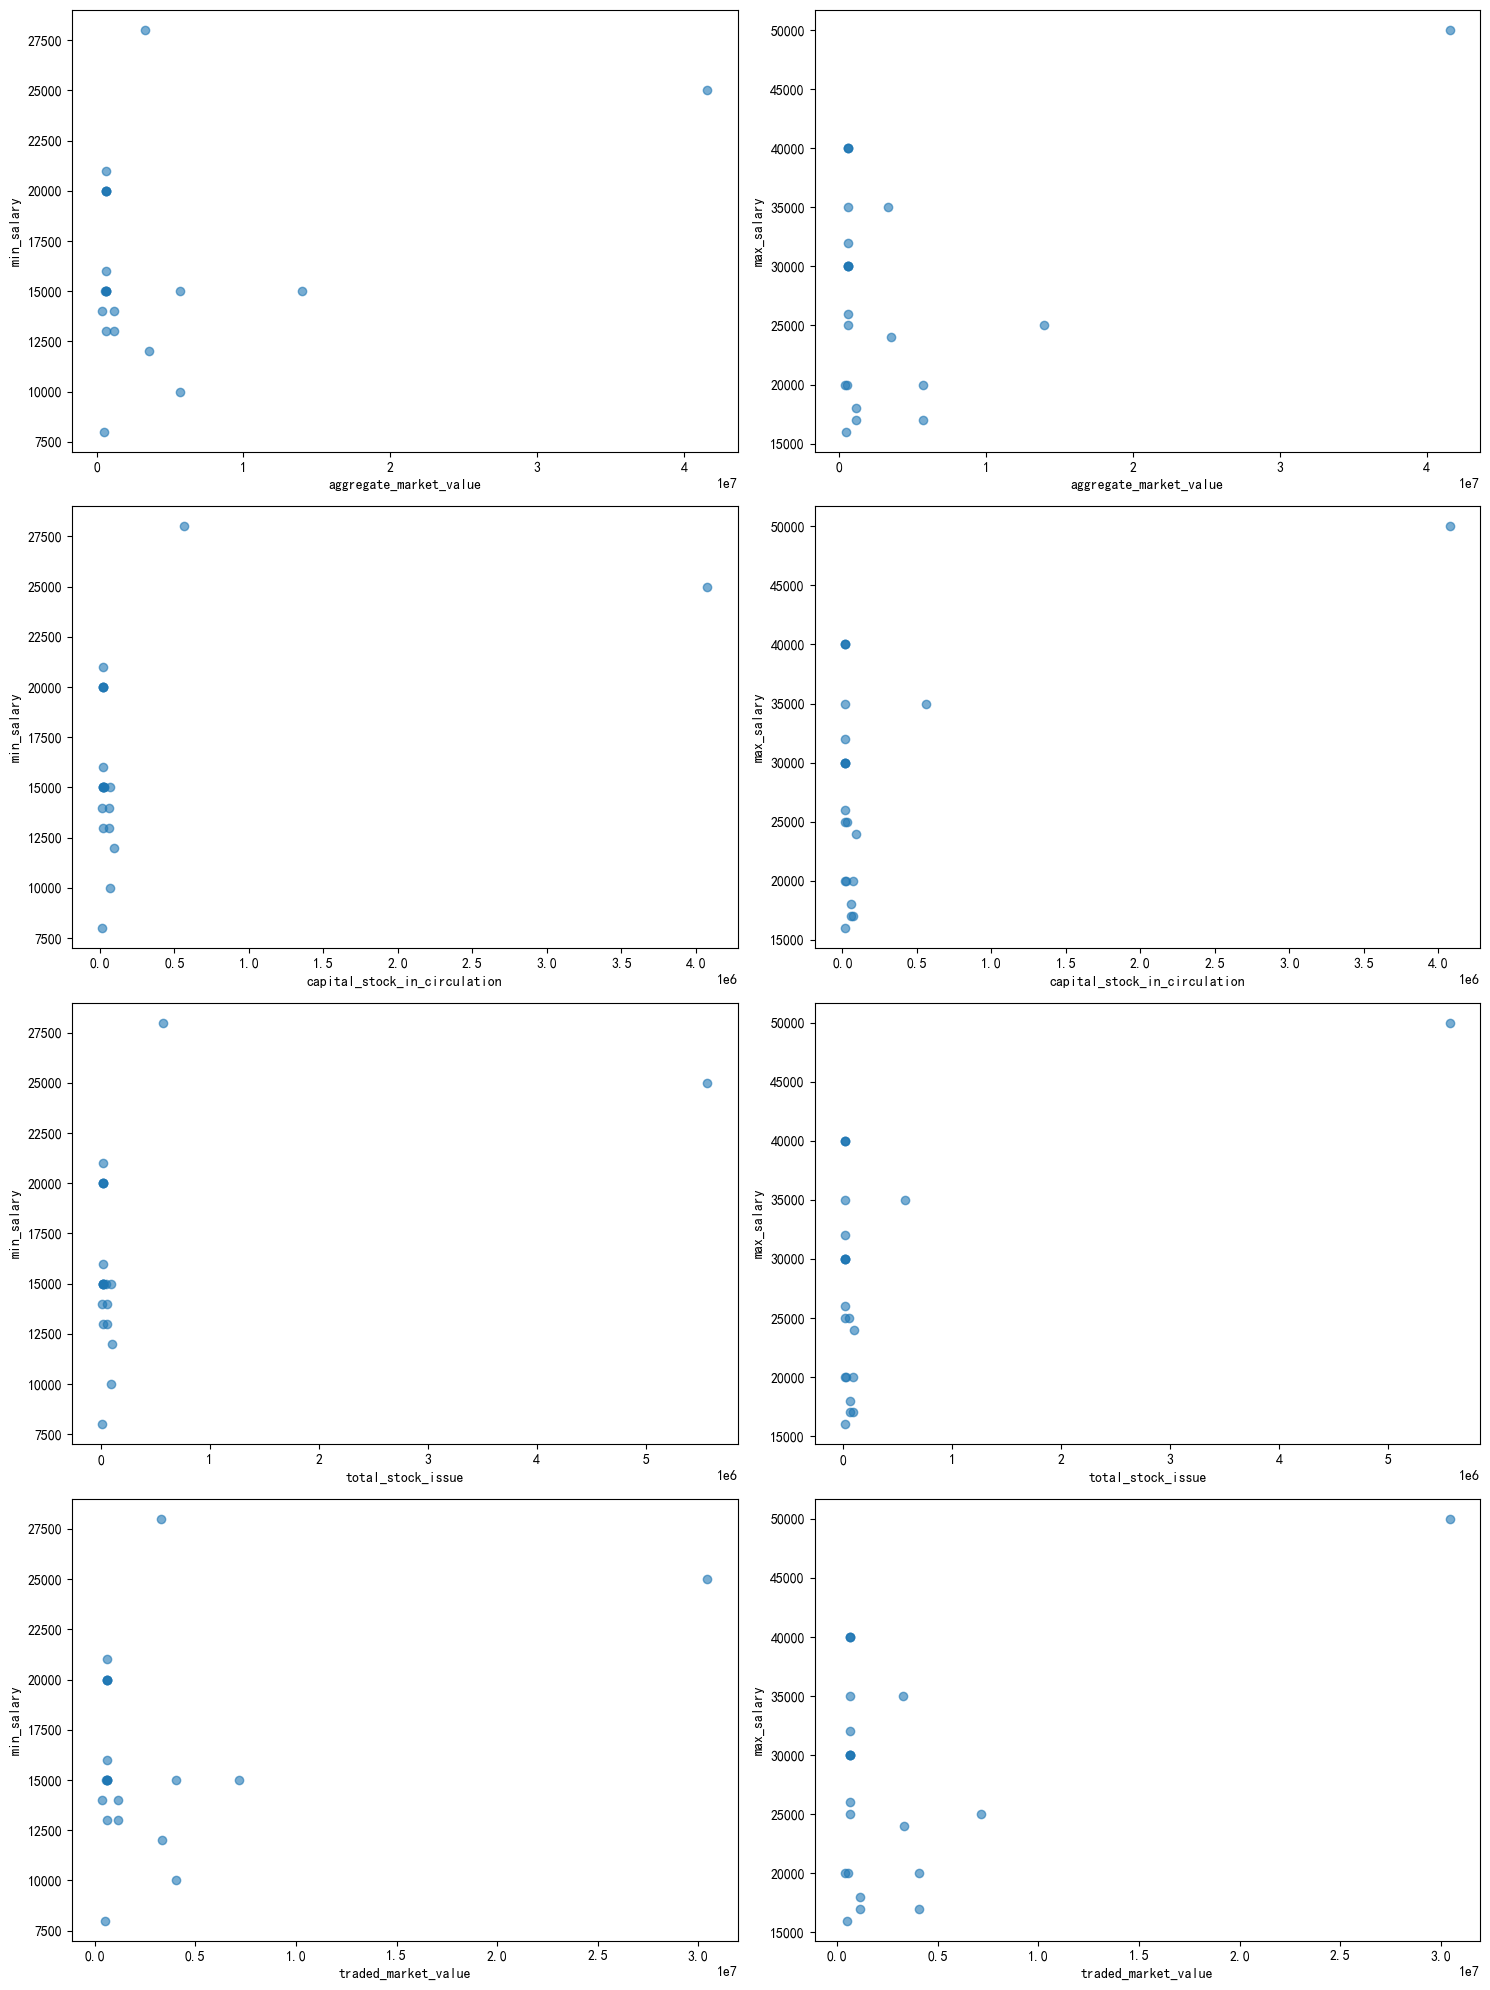

In [50]:
# 下面分析上市公司对薪资的不同

import matplotlib.pyplot as plt

x_list = ['aggregate_market_value', 'capital_stock_in_circulation', 'total_stock_issue', 'traded_market_value']
y_list = ['min_salary', 'max_salary']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, x in enumerate(x_list):
    for j, y in enumerate(y_list):
        # 计算当前子图的位置
        ax = axes[i, j]
        
        ax.scatter(df_merge[x], df_merge[y], alpha=0.6)

        ax.set_xlabel(x)
        ax.set_ylabel(y)

# 调整子图之间的间距
plt.tight_layout()

plt.show()